In [2]:
%cd "~/pln-brca-xp/notebooks"
%load_ext autoreload
%autoreload 2

/home/xabush/pln-brca-xp/notebooks


In [347]:
import numpy as np

from utils import *
from utils_emb import *

In [4]:
st_df = pd.read_csv("/var/www/datasets/embedding_vector_state_and_outcome.csv", index_col="patient_ID")
ge_df = pd.read_csv("/var/www/datasets/merged-combat15.csv.xz", index_col="patient_ID")


In [5]:
tamoxifen_studies_v2 = ["GSE12093",  "GSE1379", "GSE17705", "GSE9893"]
st_tamx_df = st_df[st_df["series_id"].isin(tamoxifen_studies_v2)]
ge_out_df = ge_df.join(st_df["posOutcome"])
ge_tamx_df = ge_df.loc[st_tamx_df.index,:]
ge_out_tamx_df = ge_tamx_df.join(st_df["posOutcome"])
st_tamx_tr, st_tamx_te, y_st_tamx_tr, y_st_tamx_te = get_train_test_set(st_tamx_df, "/var/www/datasets/tamox_train_set.txt", "/var/www/datasets/tamox_test_set.txt")

In [11]:
X_ppt_tr, X_ppt_te = pd.read_table("/var/www/datasets/embedding-vectors/tamoxifen_group/property_vector_100genes_ge_pln_TRAIN_2021-03-25.csv", index_col="patient_ID"), pd.read_table("/var/www/datasets/embedding-vectors/tamoxifen_group/property_vector_100genes_ge_pln_TEST_2012-03-25.csv", index_col="patient_ID")
print(X_ppt_tr.shape)
y_ppt_tr, y_ppt_te = X_ppt_tr.join(st_tamx_df["posOutcome"])["posOutcome"], X_ppt_te.join(st_tamx_df["posOutcome"])["posOutcome"]

(449, 6748)


In [6]:
gse17705_idx_tr, gse17705_idx_te = st_tamx_tr[st_tamx_tr["series_id"] == "GSE17705"].index, st_tamx_te[st_tamx_te["series_id"] == "GSE17705"].index

In [7]:
X_tr_17705, y_tr_17705 = ge_tamx_df.loc[gse17705_idx_tr], ge_out_tamx_df["posOutcome"].loc[gse17705_idx_tr]
X_te_17705, y_te_17705 = ge_tamx_df.loc[gse17705_idx_te], ge_out_tamx_df["posOutcome"].loc[gse17705_idx_te]
print(X_tr_17705.shape)
print(X_te_17705.shape)

(207, 8832)
(91, 8832)


In [8]:
feats_mrmr = load_features("/var/www/datasets/feats_100_raw_nn.txt")
X_mrmr_tr_17705, y_mrmr_tr = ge_tamx_df.loc[gse17705_idx_tr][feats_mrmr], ge_out_tamx_df["posOutcome"].loc[gse17705_idx_tr]
X_mrmr_te_17705, y_mrmr_te = ge_tamx_df.loc[gse17705_idx_te][feats_mrmr], ge_out_tamx_df["posOutcome"].loc[gse17705_idx_te]

In [9]:
ge_diff_100_df = pd.read_csv("https://raw.githubusercontent.com/singnet/cancer/master/data/curatedBreastData/diffExp/top100genes4studies.csv")
feats_diff_100 = ge_diff_100_df["symbol"].tolist()
X_ge_tx_diff_tr, X_ge_tx_diff_te = ge_tamx_df.loc[gse17705_idx_tr][feats_diff_100], ge_tamx_df.loc[gse17705_idx_te][feats_diff_100]

In [12]:
X_ppt_tr_17705, y_ppt_tr_17705 = X_ppt_tr.loc[gse17705_idx_tr], y_ppt_tr.loc[gse17705_idx_tr]
X_ppt_te_17705, y_ppt_te_17705 = X_ppt_te.loc[gse17705_idx_te], y_ppt_te.loc[gse17705_idx_te]

In [269]:
from sklearn.feature_selection import VarianceThreshold
feats_q = load_features("/var/www/datasets/feats_100_mrmr_tamoxifen_qnormalized.txt")
qnorm = MQNormalizer()
X_mrmr_tr_17705_q, X_mrmr_te_17705_q = qnorm.fit_transform(ge_tamx_df.loc[gse17705_idx_tr])[feats_q], qnorm.transform(ge_tamx_df.loc[gse17705_idx_te])[feats_q]

var_thr = VarianceThreshold(threshold=0.0)
var_thr.fit(X_mrmr_tr_17705_q)
idxs = var_thr.get_support(X_mrmr_tr_17705_q.columns.to_list())
X_mrmr_tr_17705_q = X_mrmr_tr_17705_q.iloc[:,idxs]
X_mrmr_tr_17705_q

,SLC44A1_underexpr,CX3CR1_underexpr,EDC3_overexpr,ZNF192_overexpr,MB_overexpr,TSTA3_underexpr,GRB7_overexpr,ATP6V1G1_overexpr,DIDO1_underexpr,PFKFB3_overexpr,...,TRIT1_overexpr,ZNF696_overexpr,TAS2R10_underexpr,MCM2_underexpr,PLA2G12A_overexpr,FBXO22_overexpr,ELF3_underexpr,NVL_overexpr,ADRA2A_underexpr,GP1BB_overexpr
441791,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.534139,0.000000,0.000000,...,0.780696,0.767027,0.000000,0.704962,0.759032,0.0,0.000000,0.769229,0.656542,0.000000
441669,0.688138,0.000000,0.749690,0.75,0.668201,0.000000,0.000000,0.000000,0.548354,0.000000,...,0.000000,0.000000,1.000000,0.887071,0.000000,0.0,0.753120,0.638079,0.000000,0.556488
441716,0.000000,0.781144,0.749690,0.75,0.000000,0.816391,0.637001,0.791564,0.000000,0.920581,...,0.579972,0.804256,1.000000,0.000000,0.565249,0.0,0.628733,0.805296,0.751108,0.654242
441682,0.548359,0.554985,0.749690,0.75,0.575291,0.786774,0.751107,0.727153,0.000000,0.000000,...,0.601892,0.527054,1.000000,0.000000,0.761581,0.0,0.000000,0.000000,0.797848,0.586737
441815,0.000000,0.000000,0.000000,0.00,0.703752,0.000000,0.750148,0.000000,0.000000,0.844401,...,0.790341,0.835419,0.000000,0.000000,0.515849,0.0,0.623612,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441763,0.000000,0.766138,0.000000,0.00,0.000000,0.736752,0.783105,0.722346,0.857019,0.000000,...,0.837939,0.930013,0.000000,0.000000,0.000000,0.0,0.000000,0.840930,0.000000,0.000000
441884,0.000000,0.000000,0.000000,0.00,1.000000,0.000000,0.000000,0.000000,0.830617,0.723050,...,0.553854,0.799748,0.000000,0.709466,0.000000,0.0,0.646356,0.000000,0.656542,0.593787
441715,0.698708,0.812556,0.000000,0.75,0.566222,0.000000,0.791334,0.692144,0.656909,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.879328,0.0,0.000000,0.650940,0.967259,0.505098
441685,0.000000,0.664716,0.784525,0.75,0.000000,0.586272,0.760724,0.895385,0.000000,0.000000,...,0.000000,0.872619,0.502182,0.000000,0.000000,0.0,0.628733,0.000000,0.853087,0.505098


In [271]:
gamma = optimize_ker_param(X_mrmr_tr_17705_q, y_mrmr_tr.values, "gamma", ker="rbf", r=(0, 0.01))
print(gamma)

((array([0.01]),), {})
[-0.08580327]
0.01


n_components=(100, 98)


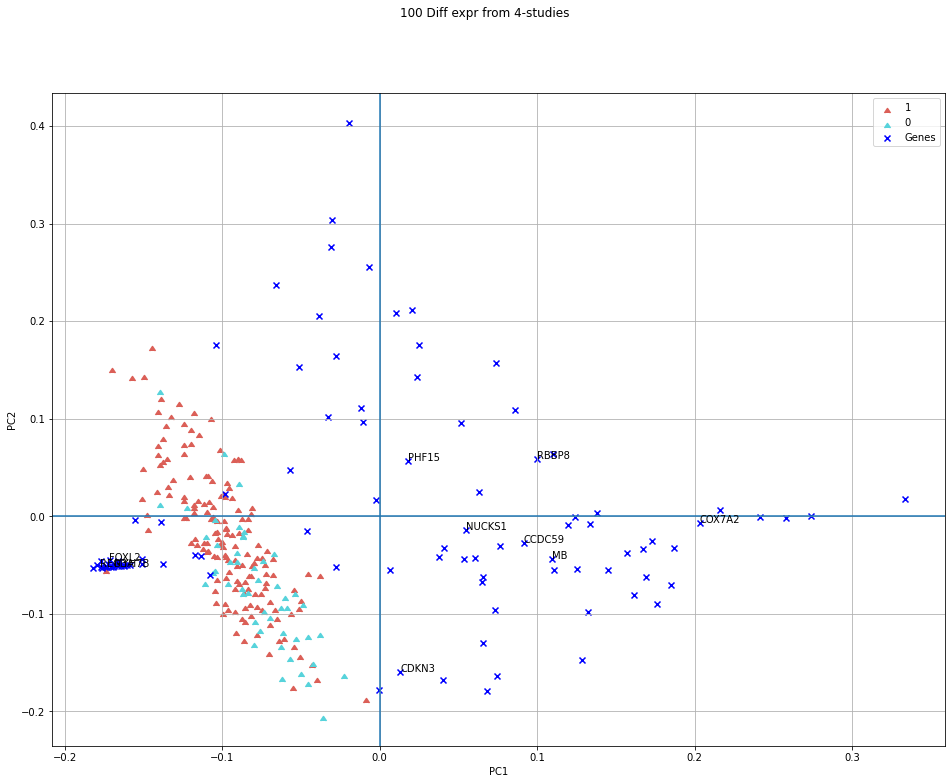

In [260]:
from utils_emb import plot_emb_projection
dist_tx_df = plot_emb_projection(X_ge_tx_diff_tr, y=y_mrmr_tr, ker="rbf", params={"gamma":0.01}, annotate=True, annotate_list=feats_diff_100[:10], title="100 Diff expr from 4-studies", label="Genes")

n_components=(100, 99)


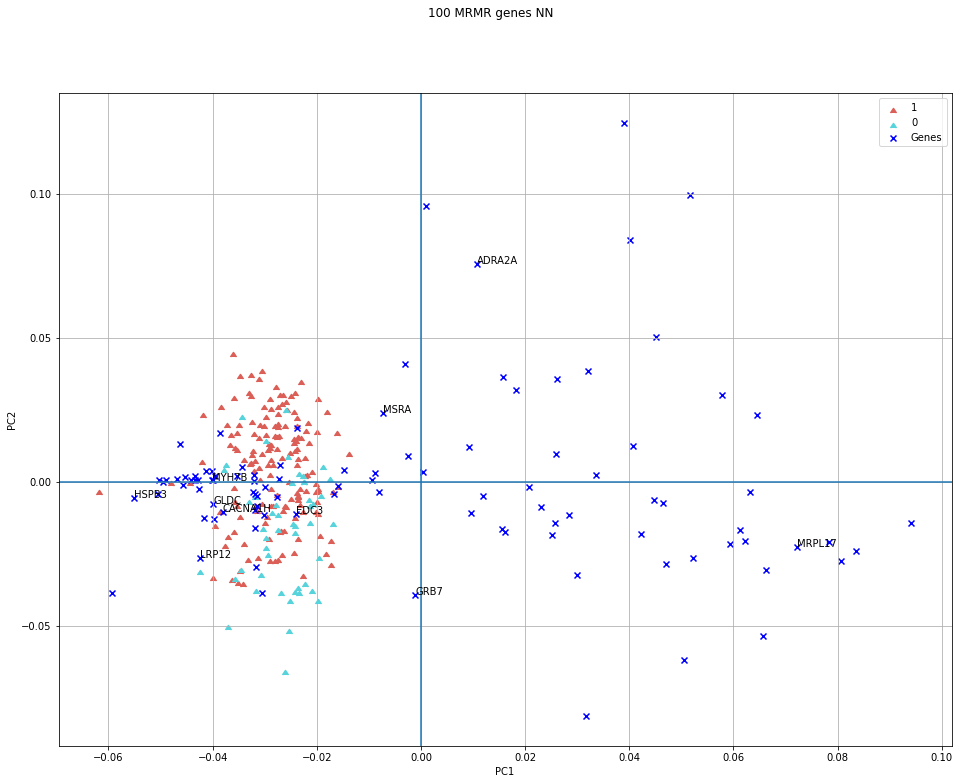

In [261]:
from utils_emb import plot_emb_projection
dist_mrmr_df = plot_emb_projection(X_mrmr_tr_17705, y=y_mrmr_tr, ker="rbf", params={"gamma":0.001}, annotate=True, annotate_list=feats_mrmr[:10], title="100 MRMR genes NN", label="Genes")

n_components=(100, 99)


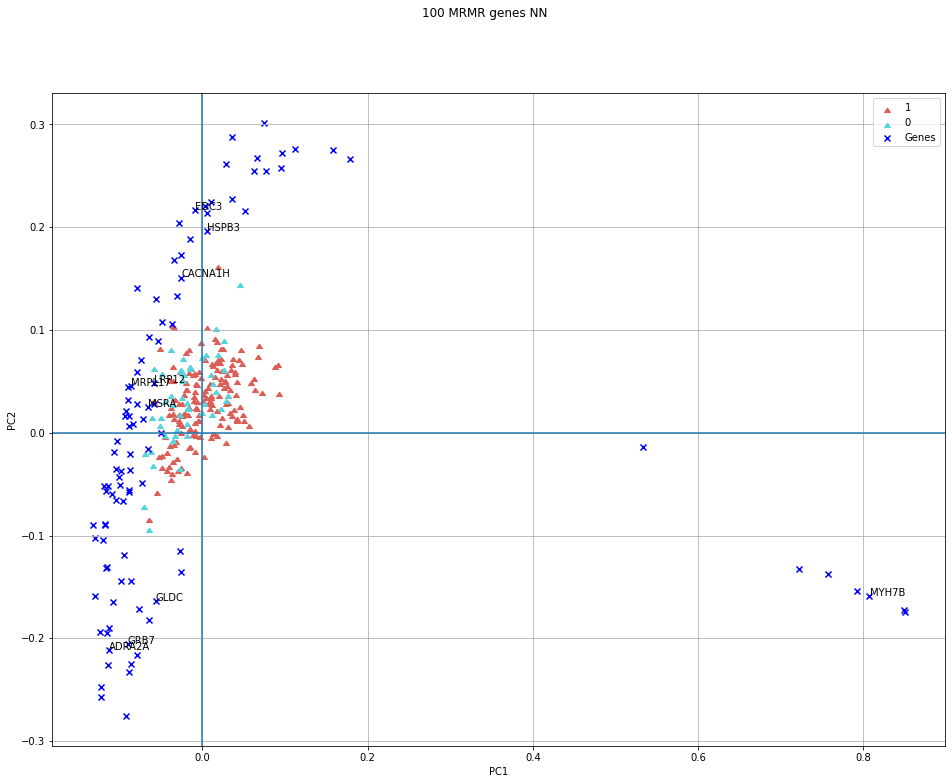

In [262]:
dist_mrmr_tan_df = plot_emb_projection(X_mrmr_tr_17705, y=y_mrmr_tr, ker=tanimoto_v2, annotate=True, annotate_list=feats_mrmr[:10], title="100 MRMR genes NN", label="Genes")

n_components=(91, 90)


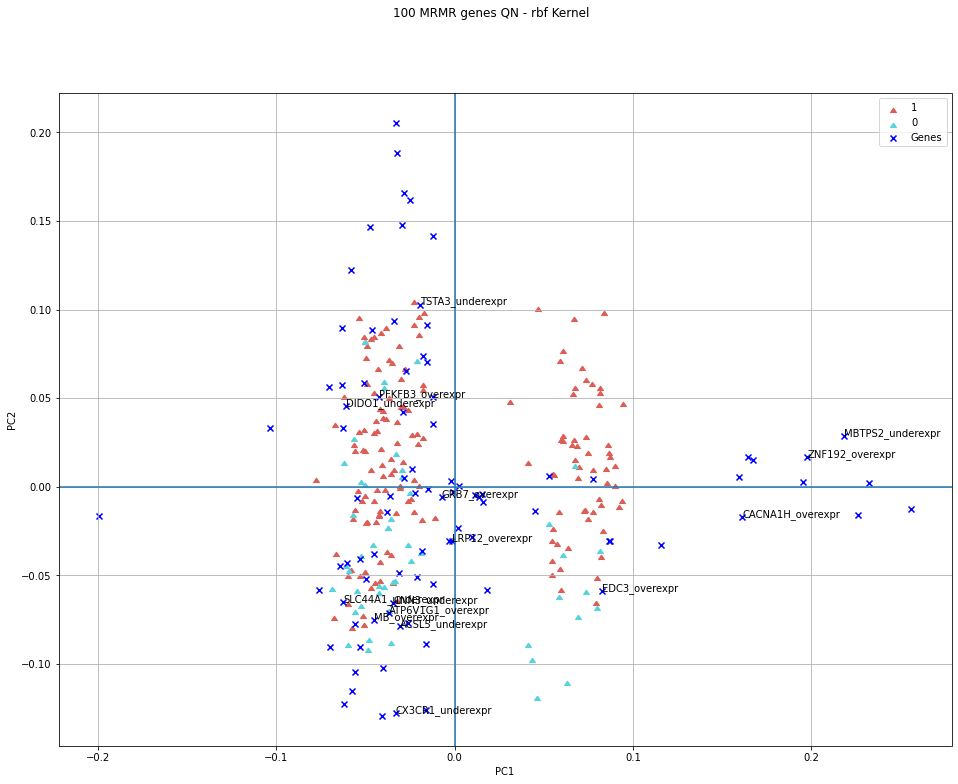

In [379]:
from utils_emb import plot_emb_projection
dist_mrmr_q_df = plot_emb_projection(X_mrmr_tr_17705_q, y=y_mrmr_tr, ker="rbf", params={"gamma":0.02}, annotate=True, title="100 MRMR genes QN - rbf Kernel", label="Genes", annotate_list=X_mrmr_tr_17705_q.columns.to_list()[:15])

n_components=(91, 90)


,SLC44A1_underexpr,CX3CR1_underexpr,EDC3_overexpr,ZNF192_overexpr,MB_overexpr,TSTA3_underexpr,GRB7_overexpr,ATP6V1G1_overexpr,DIDO1_underexpr,PFKFB3_overexpr,...,TRIT1_overexpr,ZNF696_overexpr,TAS2R10_underexpr,MCM2_underexpr,PLA2G12A_overexpr,FBXO22_overexpr,ELF3_underexpr,NVL_overexpr,ADRA2A_underexpr,GP1BB_overexpr
441791,0.084387,0.100750,0.067733,0.111661,0.078128,0.087874,0.106902,0.109721,0.089002,0.091318,...,0.104333,0.135091,0.099530,0.120566,0.112345,0.113510,0.070727,0.100788,0.135993,0.089976
441669,0.134189,0.107237,0.140188,0.107127,0.138607,0.106139,0.127331,0.110941,0.125717,0.088151,...,0.103044,0.103410,0.158034,0.117894,0.085335,0.101078,0.149111,0.134920,0.115735,0.133172
441716,0.066145,0.102467,0.104392,0.097574,0.093722,0.127198,0.123502,0.104775,0.075244,0.124633,...,0.099787,0.121848,0.129212,0.094821,0.127019,0.114502,0.093138,0.122099,0.121419,0.106129
441682,0.119479,0.110736,0.119780,0.126375,0.108163,0.123842,0.144744,0.121417,0.097740,0.087839,...,0.138426,0.099209,0.113574,0.088374,0.122215,0.105676,0.091458,0.114849,0.104743,0.118865
441815,0.100146,0.106698,0.101275,0.129192,0.128140,0.103998,0.163047,0.114107,0.107522,0.127424,...,0.126565,0.165140,0.125994,0.124292,0.111043,0.118628,0.114640,0.115791,0.144925,0.109252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441763,0.104486,0.151576,0.134161,0.129646,0.099817,0.129419,0.132144,0.154384,0.150569,0.085161,...,0.145825,0.147762,0.138090,0.096443,0.104745,0.119701,0.097657,0.141357,0.113454,0.123254
441884,0.108772,0.113264,0.111266,0.136568,0.137676,0.105758,0.096933,0.113721,0.141576,0.162330,...,0.138162,0.159160,0.126087,0.124240,0.105071,0.105411,0.126268,0.105941,0.144028,0.136484
441715,0.118976,0.112192,0.093108,0.109229,0.117036,0.094809,0.120705,0.107515,0.104941,0.086790,...,0.099300,0.100593,0.117191,0.116572,0.122721,0.082842,0.086318,0.113847,0.155957,0.101609
441685,0.107068,0.137976,0.149489,0.128084,0.092745,0.114898,0.134355,0.121089,0.101646,0.101382,...,0.109641,0.139274,0.109960,0.097316,0.106487,0.136711,0.112720,0.127609,0.147636,0.122342


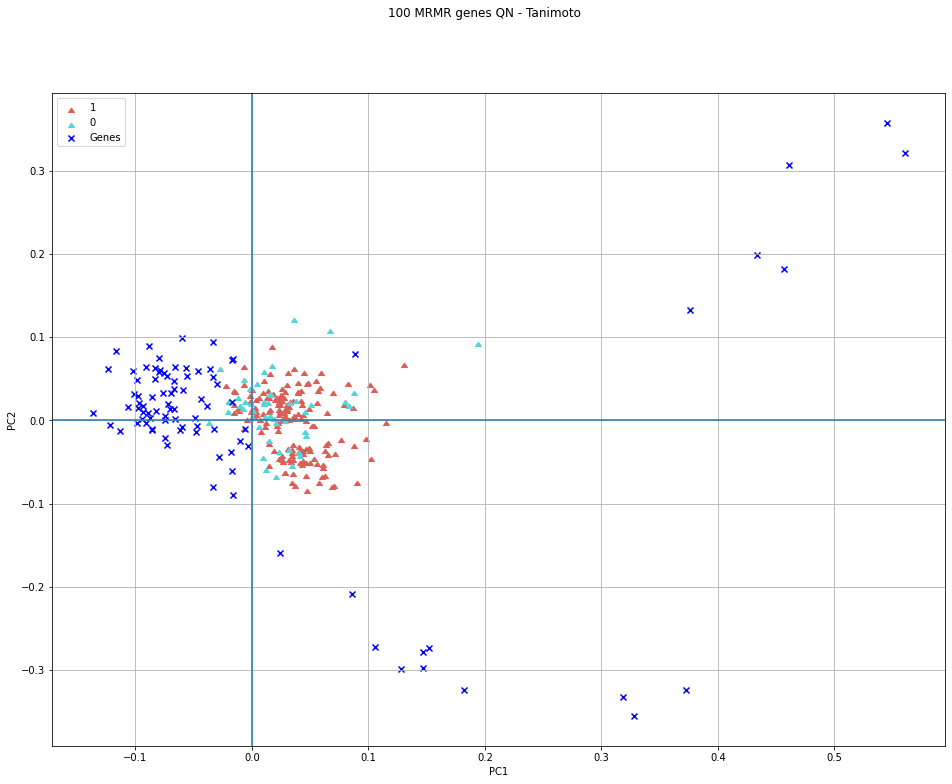

In [373]:
plot_emb_projection(X_mrmr_tr_17705_q, y=y_mrmr_tr, ker=tanimoto_v2, annotate=False, title="100 MRMR genes QN - Tanimoto", label="Genes", annotate_list=X_mrmr_tr_17705_q.columns.to_list()[:5])

n_components=(91, 90)


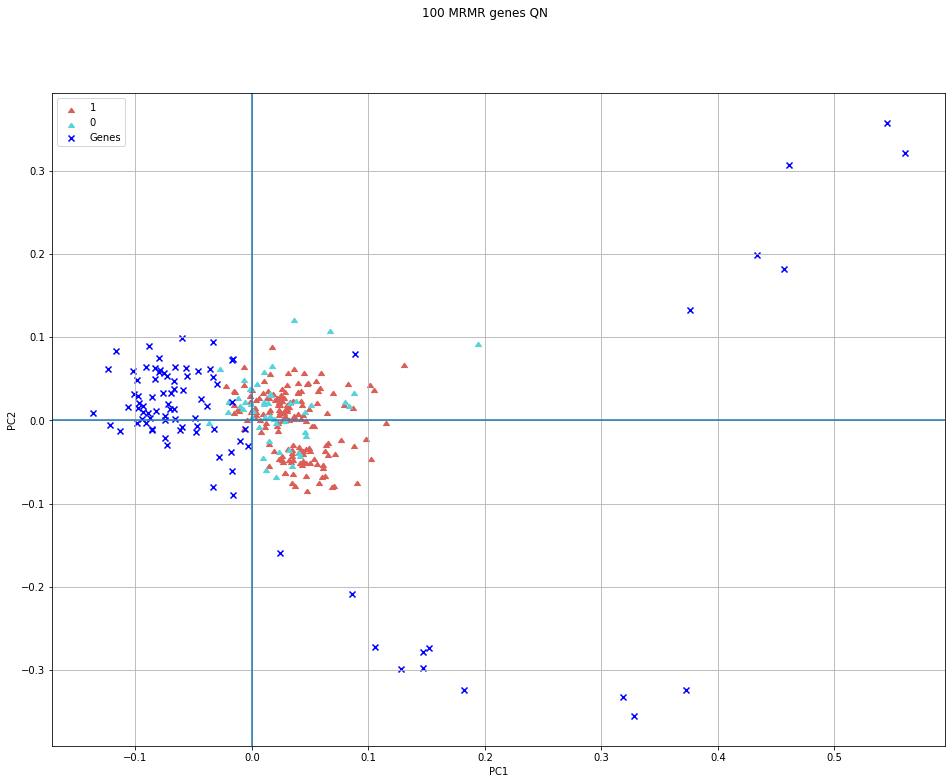

In [277]:
dist_mrmr_q_tan_df = plot_emb_projection(X_mrmr_tr_17705_q, y=y_mrmr_tr, ker=tanimoto_v2, annotate=False, title="100 MRMR genes QN", label="Genes", annotate_list=X_mrmr_tr_17705_q.columns.to_list()[:15])

In [302]:
import diffxpy.api as de
import anndata

data = anndata.AnnData(
    X=X_tr_17705.values,
    var=pd.DataFrame(index=X_tr_17705.columns.to_list()),
    obs=y_tr_17705.to_frame()
)
diff_expr = de.test.wald(
    data=data,
    formula_loc="~ 1 + posOutcome",
    factor_loc_totest="posOutcome"
)

training location model: False
training scale model: True
iter   0: ll=1355253575.536082
iter   1: ll=1355253575.536082, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=1088090052.768157, converged: 79.18% (loc: 79.18%, scale update: True), in 17.30sec
iter   3: ll=1088090052.768157, converged: 79.18% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=1078183253.889093, converged: 85.94% (loc: 85.94%, scale update: True), in 4.91sec
iter   5: ll=1078183253.889093, converged: 85.94% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=1078092160.513358, converged: 94.59% (loc: 94.59%, scale update: True), in 3.30sec
iter   7: ll=1078092160.513358, converged: 94.59% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=1078074095.483338, converged: 98.35% (loc: 98.35%, scale update: True), in 1.75sec
iter   9: ll=1078074095.483338, converged: 98.35% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=1078067492.152435, conve

In [303]:
diff_expr.summary().sort_values(by="pval")

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
1958,S100P,0.000776,0.999991,-1.910501e-01,7.535506,False,2.967592e-01,-1.910501e-01,0.056838,-130.300764
6538,NTRK2,0.001159,0.999991,2.479709e-01,5.285730,False,6.137740e-01,2.479709e-01,0.076325,-160.123503
3318,ABAT,0.002784,0.999991,2.060414e-01,6.324903,False,4.777872e+00,2.060414e-01,0.068896,-57.644254
7611,SFRP1,0.004309,0.999991,2.005402e-01,6.063294,False,4.312239e-01,2.005402e-01,0.070252,0.000000
3231,ADRA2A,0.006357,0.999991,1.985398e-01,5.646142,False,6.594832e-15,1.985398e-01,0.072757,-154099.094888
...,...,...,...,...,...,...,...,...,...,...
2294,CYP1A1,0.999968,0.999991,-3.799739e-06,2.967118,False,1.177802e-15,-3.799739e-06,0.094927,-154099.094888
2595,TULP2,0.999975,0.999991,-2.982234e-06,2.950142,False,2.033799e-15,-2.982234e-06,0.095200,-154099.094888
4692,DPP6,0.999990,0.999991,-1.172874e-06,2.906113,False,9.782835e-16,-1.172874e-06,0.095918,-154099.094888
1025,GCM2,0.999991,0.999991,-9.852707e-07,3.522190,False,3.125787e-15,-9.852707e-07,0.087127,-154099.094888


In [304]:
diff_expr_df = diff_expr.summary()
feat_diff_exp = diff_expr_df[diff_expr_df["pval"] < 0.05].sort_values(by="pval")["gene"].to_list()

In [358]:
X_diff_tr_17705 = X_tr_17705[feat_diff_exp]
X_diff_te_17705 = X_te_17705[feat_diff_exp]

In [329]:
gamma = optimize_ker_param(X_diff_tr_17705, y_tr_17705.values, "gamma", ker="rbf", r=(0, 0.1))
print(gamma)

((array([0.00182006]),), {})
[-0.08146856]
0.0018200585175643103


n_components=(20, 19)


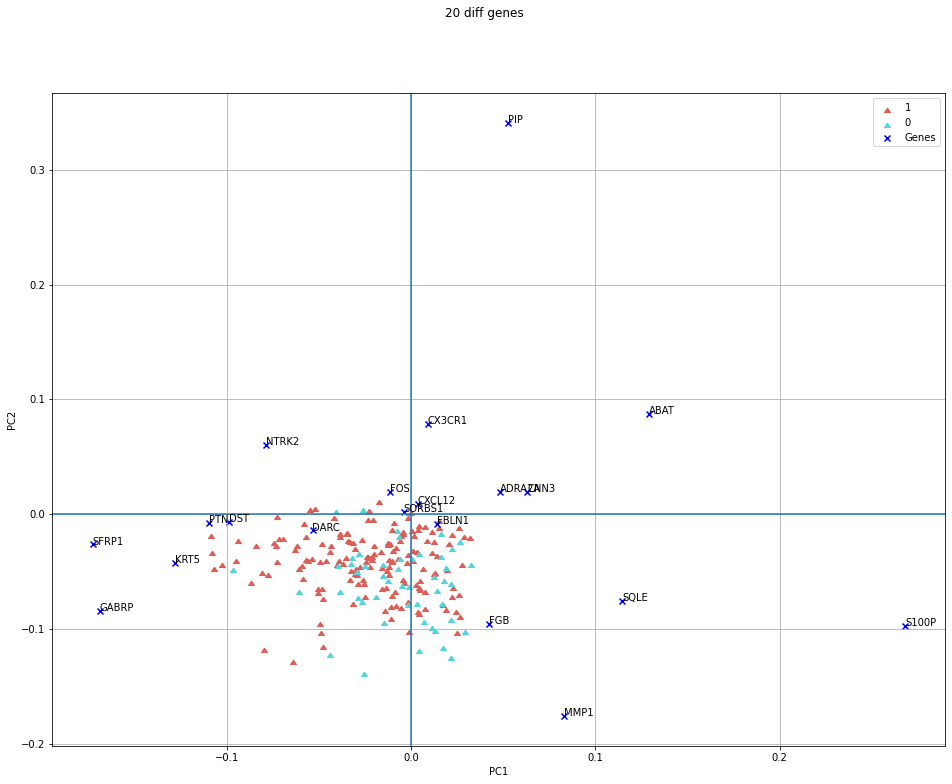

In [359]:
from utils_emb import plot_emb_projection
dist_diff_exp = plot_emb_projection(X_diff_tr_17705, y=y_tr_17705, ker="rbf", params={"gamma": 0.002} ,annotate=True, annotate_list=feat_diff_exp, title="20 diff genes", label="Genes")

n_components=(20, 19)


,S100P,NTRK2,ABAT,SFRP1,ADRA2A,FOS,CX3CR1,PIP,CXCL12,GABRP,DARC,FBLN1,FGB,MMP1,PTN,SQLE,CNN3,DST,SORBS1,KRT5
441791,0.068754,0.088922,0.058352,0.089406,0.065328,0.110762,0.108314,0.081851,0.068644,0.091591,0.098659,0.132645,0.143746,0.076381,0.085519,0.078132,0.089854,0.087642,0.093820,0.097414
441669,0.066872,0.117943,0.033232,0.083913,0.071637,0.078555,0.105068,0.081237,0.057049,0.075884,0.064650,0.053961,0.115414,0.057837,0.035964,0.052357,0.043346,0.061806,0.089479,0.051720
441716,0.056073,0.108713,0.057750,0.060803,0.045750,0.057103,0.056084,0.048720,0.071990,0.037225,0.117345,0.039382,0.105625,0.069589,0.119488,0.102673,0.048777,0.091983,0.088460,0.046907
441682,0.053462,0.114193,0.086623,0.048071,0.029954,0.080307,0.087656,0.082182,0.058117,0.027836,0.114681,0.073898,0.102446,0.070967,0.128659,0.100441,0.077969,0.066763,0.100079,0.047910
441815,0.059653,0.116506,0.094017,0.081593,0.110698,0.103152,0.157721,0.125484,0.060591,0.099310,0.072483,0.048288,0.156324,0.094642,0.083821,0.119984,0.058645,0.119951,0.155880,0.093134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441763,0.090108,0.068921,0.069325,0.072237,0.135419,0.075107,0.067018,0.082285,0.070359,0.093573,0.089962,0.065771,0.107433,0.086490,0.098262,0.126117,0.065257,0.077418,0.162687,0.087769
441884,0.111789,0.137336,0.092885,0.132040,0.087468,0.139485,0.097637,0.098445,0.095612,0.089474,0.158294,0.085671,0.124409,0.110645,0.095620,0.093900,0.111121,0.200513,0.125799,0.285036
441715,0.058910,0.090006,0.076072,0.087729,0.037241,0.075598,0.057709,0.103574,0.052915,0.085005,0.109061,0.020831,0.094482,0.061394,0.117975,0.123444,0.076177,0.125812,0.077377,0.097300
441685,0.096158,0.081609,0.094497,0.065778,0.070782,0.057467,0.101020,0.056876,0.063873,0.066530,0.107199,0.089059,0.142115,0.114871,0.113759,0.089395,0.053058,0.079674,0.044461,0.127297


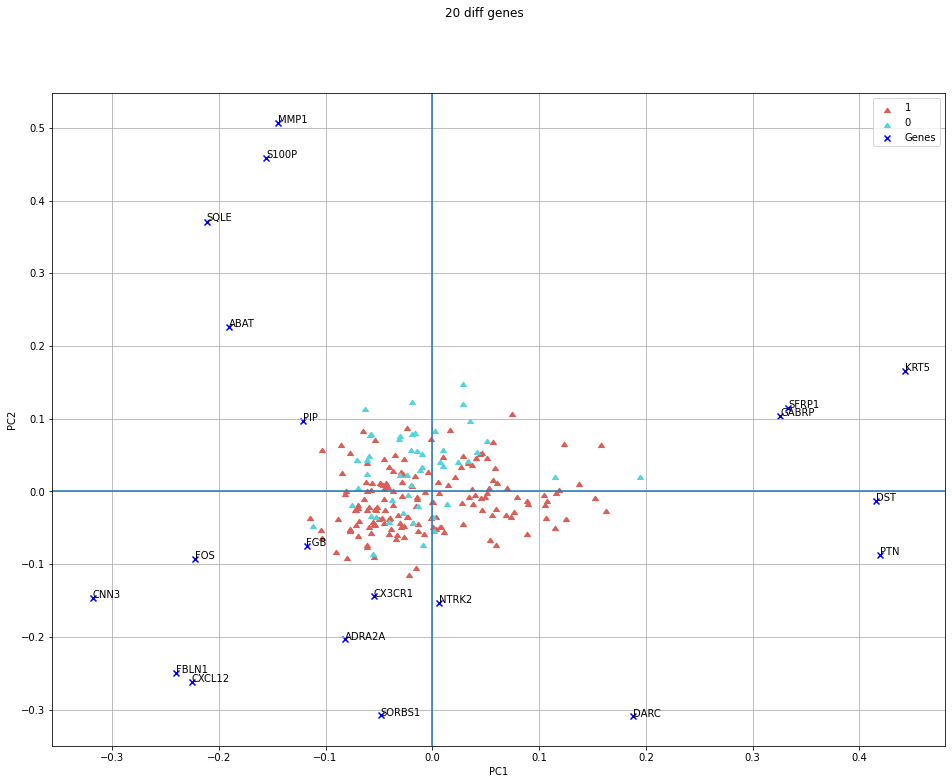

In [360]:
dist_diff_tan_exp = plot_emb_projection(X_diff_tr_17705, y=y_tr_17705, ker=tanimoto_v2, annotate=True, annotate_list=feat_diff_exp[:20], title="20 diff genes", label="Genes")
display(dist_diff_tan_exp)

n_components=(20, 19)


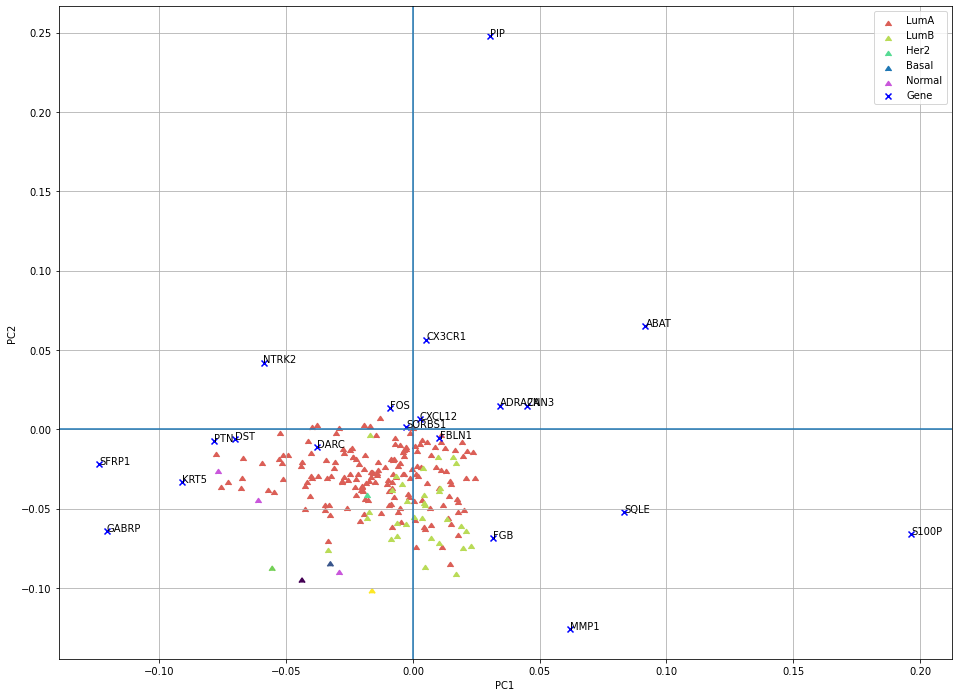

In [333]:
_ = plot_emb_projection(X_diff_tr_17705, y=st_tamx_df["pam_coincide"], target_name="pam_coincide", ker="rbf", params={"gamma": 0.001}, annotate=True, annotate_list=feat_diff_exp[:20], label="Gene")

In [356]:
import diffxpy.api as de
import anndata

data_tx = anndata.AnnData(
    X=ge_tamx_df.values,
    var=pd.DataFrame(index=ge_tamx_df.columns.to_list()),
    obs=ge_out_tamx_df["posOutcome"].to_frame()
)
diff_expr_tx = de.test.wald(
    data=data_tx,
    formula_loc="~ 1 + posOutcome",
    factor_loc_totest="posOutcome"
)

training location model: False
training scale model: True
iter   0: ll=4248783199.317695
iter   1: ll=4248783199.317695, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=1676566922.512474, converged: 38.59% (loc: 38.59%, scale update: True), in 25.76sec
iter   3: ll=1676566922.512474, converged: 38.59% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=1651109112.985863, converged: 58.97% (loc: 58.97%, scale update: True), in 18.44sec
iter   5: ll=1651109112.985863, converged: 58.97% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=1650548299.977752, converged: 84.85% (loc: 84.85%, scale update: True), in 10.93sec
iter   7: ll=1650548299.977752, converged: 84.85% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=1650396262.499774, converged: 95.79% (loc: 95.79%, scale update: True), in 4.66sec
iter   9: ll=1650396262.499774, converged: 95.79% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=1650353633.685847, con

In [361]:
diff_expr_tx_df = diff_expr_tx.summary()
feat_diff_exp_tx = diff_expr_tx_df[diff_expr_tx_df["pval"] < 0.05].sort_values(by="pval")["gene"].to_list()
X_tx_diff_tr_17705 = X_tr_17705[feat_diff_exp_tx]
X_tx_diff_te_17705 = X_te_17705[feat_diff_exp_tx]
print(len(feat_diff_exp_tx))

174


In [363]:
gamma = optimize_ker_param(X_tx_diff_tr_17705, y_tr_17705.values, "gamma", ker="rbf", r=(0, 0.01))
print(gamma)

((array([0.01]),), {})
[-0.05101592]
0.01


n_components=(174, 173)


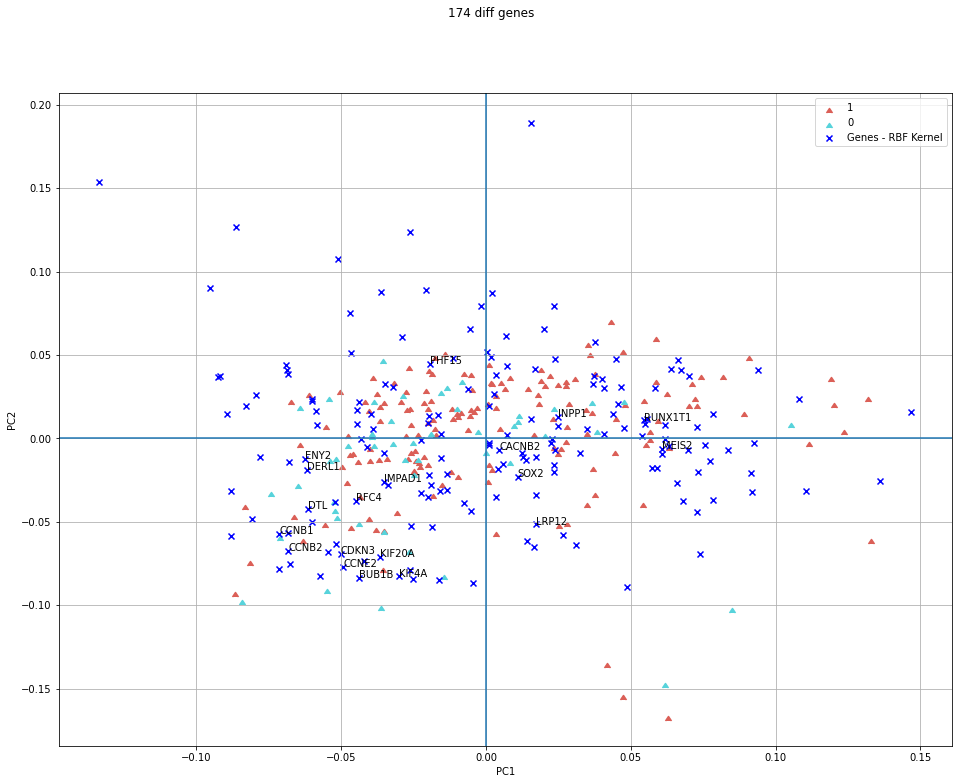

In [440]:
from utils_emb import plot_emb_projection
dist_tx_diff_exp = plot_emb_projection(X_tx_diff_tr_17705, y=y_tr_17705, ker="rbf", params={"gamma": 0.002} ,annotate=True, annotate_list=top_20_mean_dist[1:], title="174 diff genes", label="Genes - RBF Kernel")

In [443]:
dist_tx_diff_exp_out = dist_tx_diff_exp.join(st_tamx_df["posOutcome"])
dist_tx_diff_exp_out_0 = dist_tx_diff_exp_out[dist_tx_diff_exp_out["posOutcome"] == 0]
top_50_mean_dist = dist_tx_diff_exp_out_0.mean().sort_values(ascending=False).head(50).index.to_list()
print_array(top_50_mean_dist)

PIP
CPB1
TFF3
HLA-DQA1
SCGB2A1
ESR1
S100P
PDZK1
FABP7
AGTR1
TCN1
GRB14
KRT23
TFPI2
STC2
SERPINA5
ELF5
CGA
MAPT
RARRES1
S100A9
MUC1
NTRK2
TMC5
FOS
MMP1
S100A2
ABAT
ASCL1
CEACAM5
NDP
PLAT
IFI6
GABRP
NTS
ANPEP
ACOX2
KRT6B
HPGD
CHI3L2
EEF1A2
CRABP2
IFIT1
SLC27A2
SPDEF
DLX2
NQO1
EN1
SLC2A10
SFRP1


n_components=(174, 173)


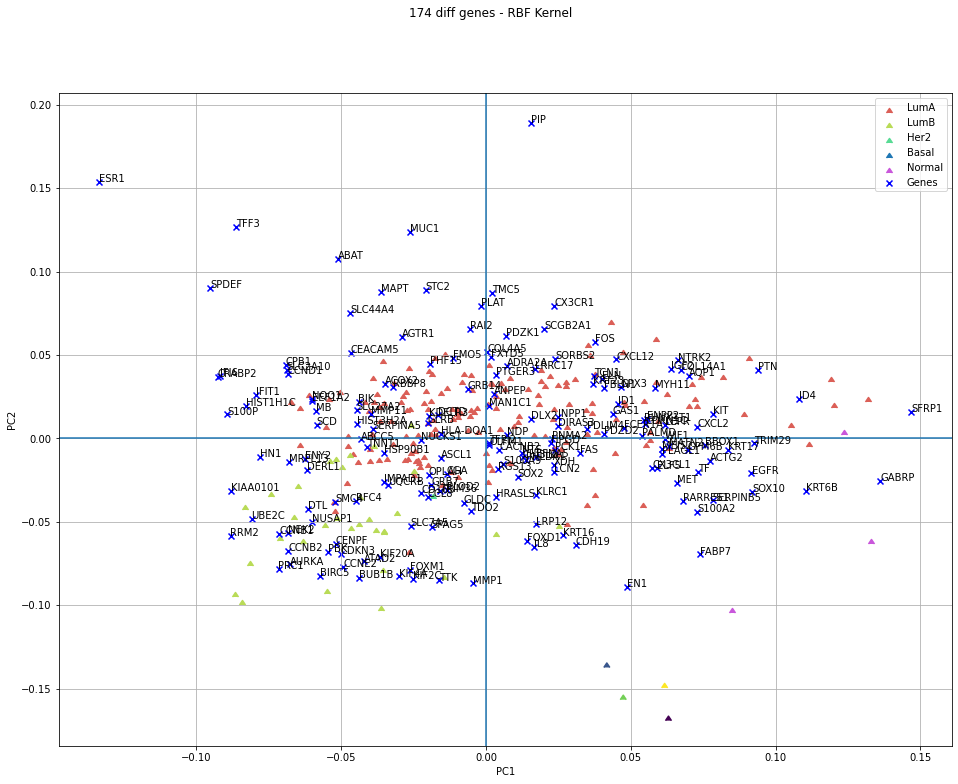

In [395]:
from utils_emb import plot_emb_projection
plot_emb_projection(X_tx_diff_tr_17705, y=st_tamx_df["pam_coincide"], target_name="pam_coincide", ker="rbf", params={"gamma": 0.002} ,annotate=True, annotate_list=feat_diff_exp_tx, return_dist=False ,title="174 diff genes - RBF Kernel", label="Genes")

In [90]:
#MRMR on property vectors
from pymrmre import mrmr
solution_ppt = mrmr.mrmr_ensemble(features=X_ppt_tr_17705, targets=y_ppt_tr_17705.to_frame(), solution_length=100,
                            solution_count=1)
feats_ppt_mrmr_100 = solution_ppt[0][0]

In [91]:
X_ppt_mrmr_tr_17705, X_ppt_mrmr_te_17705 = X_ppt_tr_17705[feats_ppt_mrmr_100], X_ppt_te_17705[feats_ppt_mrmr_100]

In [300]:
gamma = optimize_ker_param(X_ppt_mrmr_tr_17705, y_ppt_tr_17705.values, "degree", ker="poly", r=(0, 5))
print(gamma)

((array([5.]),), {})
[-0.06921142]
5.0


n_components=(100, 99)


,GO:0043270_underexp,GO:0051641_overexp,GO:0006984_overexp,GO:1901361_overexp,GO:0003714_underexp,R-HSA-1266738_overexp,GO:0009897_underexp,R-HSA-446203_underexp,GO:0051668_overexp,GO:0090257_underexp,...,GO:0051960_underexp,GO:0043062_underexp,GO:0051649_overexp,GO:0051704_overexp,GO:0033555_underexp,GO:0043231_underexp,GO:0034452_underexp,GO:0006066_overexp,GO:0019752_overexp,GO:1902533_overexp
441791,0.066024,0.095582,0.080338,0.074529,0.065205,0.068153,0.092465,0.077801,0.096889,0.056353,...,0.085109,0.102983,0.095452,0.086043,0.099913,0.109098,0.063865,0.086393,0.068648,0.070801
441669,0.070508,0.076583,0.071020,0.070863,0.102416,0.068873,0.069694,0.069793,0.074469,0.065755,...,0.073048,0.079479,0.063511,0.086369,0.080096,0.053962,0.081955,0.072303,0.063279,0.079951
441716,0.074301,0.094233,0.070392,0.060693,0.072580,0.102929,0.078383,0.065733,0.086391,0.069154,...,0.072275,0.078391,0.068354,0.066828,0.080933,0.074680,0.081079,0.074203,0.076282,0.066903
441682,0.113407,0.111642,0.099632,0.098015,0.106724,0.102614,0.114644,0.132174,0.085600,0.102596,...,0.107604,0.090192,0.087427,0.109055,0.147002,0.094937,0.108794,0.133044,0.090969,0.117228
441815,0.074859,0.104524,0.055409,0.067513,0.069481,0.083669,0.077205,0.069458,0.077011,0.086827,...,0.073958,0.080714,0.053075,0.086514,0.083559,0.074755,0.076681,0.093515,0.114439,0.079111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441763,0.104050,0.123870,0.103681,0.105740,0.143312,0.134429,0.131385,0.119248,0.143577,0.112337,...,0.143160,0.105991,0.107878,0.158203,0.114340,0.128050,0.106697,0.108984,0.111924,0.087284
441884,0.072216,0.071184,0.060533,0.058194,0.077029,0.075998,0.060736,0.070459,0.075938,0.073338,...,0.073330,0.070271,0.050720,0.076882,0.081378,0.056379,0.063919,0.062462,0.072235,0.069188
441715,0.064980,0.064903,0.056181,0.064204,0.057836,0.063540,0.063879,0.051950,0.076443,0.059892,...,0.066073,0.056582,0.056183,0.063196,0.071097,0.058605,0.053702,0.056998,0.064193,0.049974
441685,0.072063,0.081158,0.053488,0.047787,0.045658,0.034862,0.072917,0.051250,0.055779,0.062725,...,0.080418,0.058527,0.067260,0.064063,0.069967,0.066571,0.057936,0.053728,0.050163,0.065627


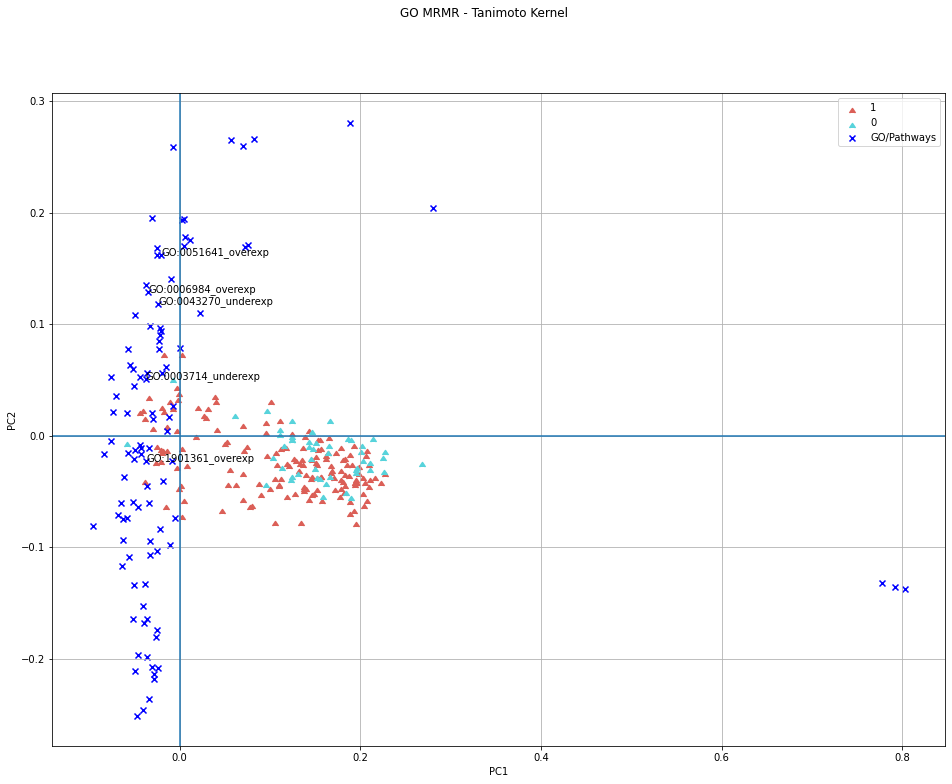

In [430]:
from utils_emb import *
dist_ppt_df = plot_emb_projection(X_ppt_mrmr_tr_17705, y=y_ppt_tr_17705, ker=tanimoto_v2, annotate=True,
                            annotate_list=feats_ppt_mrmr_100[:5], title="GO MRMR - Tanimoto Kernel")
display(dist_ppt_df)

In [432]:
dist_ppt_df_out = dist_ppt_df.join(st_tamx_df["posOutcome"])
dist_ppt_df.mean().sort_values(ascending=False)

SPRING1_overexp        0.109714
LASP1_overexp          0.109009
CCDC59_overexp         0.107717
GO:0051641_overexp     0.096440
GO:0062023_underexp    0.096308
                         ...   
GO:0006888_overexp     0.078727
GO:0002685_underexp    0.078547
GO:0051179_overexp     0.078534
GO:0009605_underexp    0.078522
GO:0044403_underexp    0.074492
Length: 100, dtype: float64

In [378]:
with open("datasets/feat_ppt_mrmr_100.txt", "w") as fp:
    for i in feats_ppt_mrmr_100:
        fp.write("{0}\n".format(i))

n_components=(100, 99)


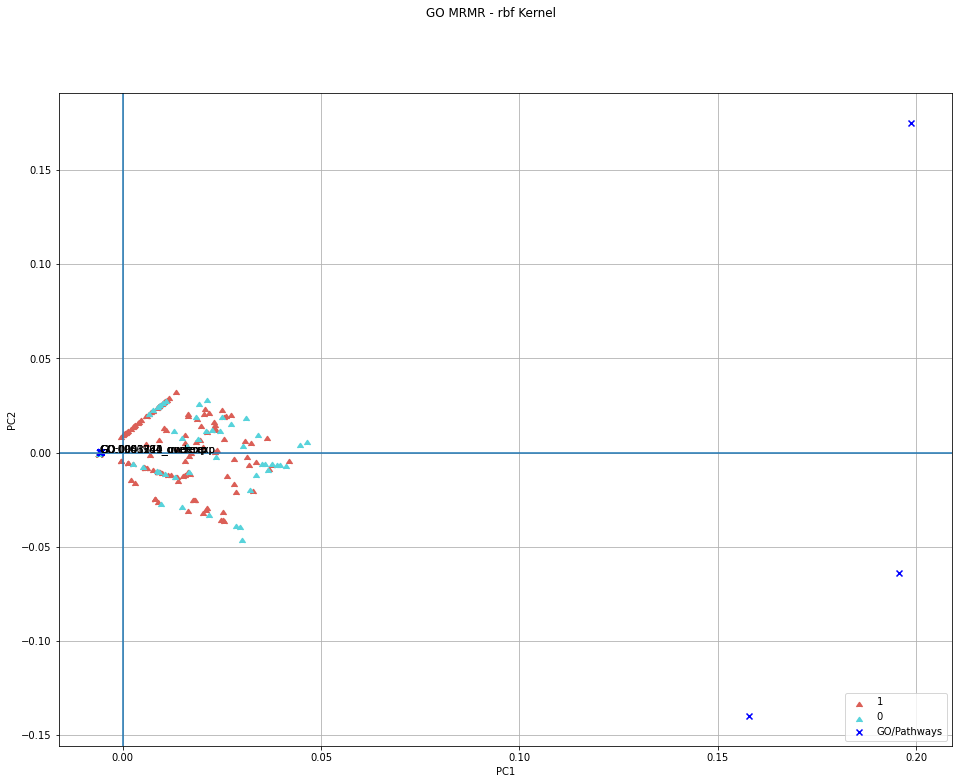

In [371]:
dist_ppt_df = plot_emb_projection(X_ppt_mrmr_tr_17705, y=y_ppt_tr_17705, ker="rbf", params={"gamma": 0.01} ,annotate=True,
                            annotate_list=feats_ppt_mrmr_100[:5], title="GO MRMR - rbf Kernel")

In [334]:
from utils import bmi
feat_scores_df = bmi(X_tr_17705, y_tr_17705, l=0.5)
display(feat_scores_df)

,bmi
MAGEA12,0.000000
MAGEA11,56.387153
KLF1,0.000000
ADH7,0.000000
MSH4,22.096207
...,...
ZSCAN2,0.000000
ZXDC,0.000000
ZYX,74.510349
ZZEF1,0.000000


<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

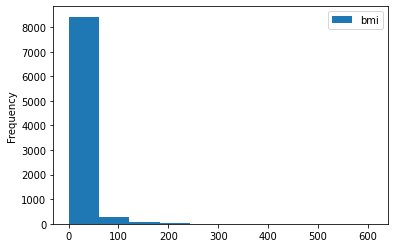

In [335]:
plt.figure()
feat_scores_df.plot.hist()

In [336]:
primary_genes = list(feat_scores_df[feat_scores_df["bmi"] > 80].index)
len(primary_genes)

194

In [341]:
gamma = optimize_ker_param(X_tr_17705[primary_genes], y_tr_17705.values, "gamma", ker="rbf", r=(0, 0.001))
print(gamma)

((array([0.001]),), {})
[-0.16809988]
0.001


n_components=(194, 193)


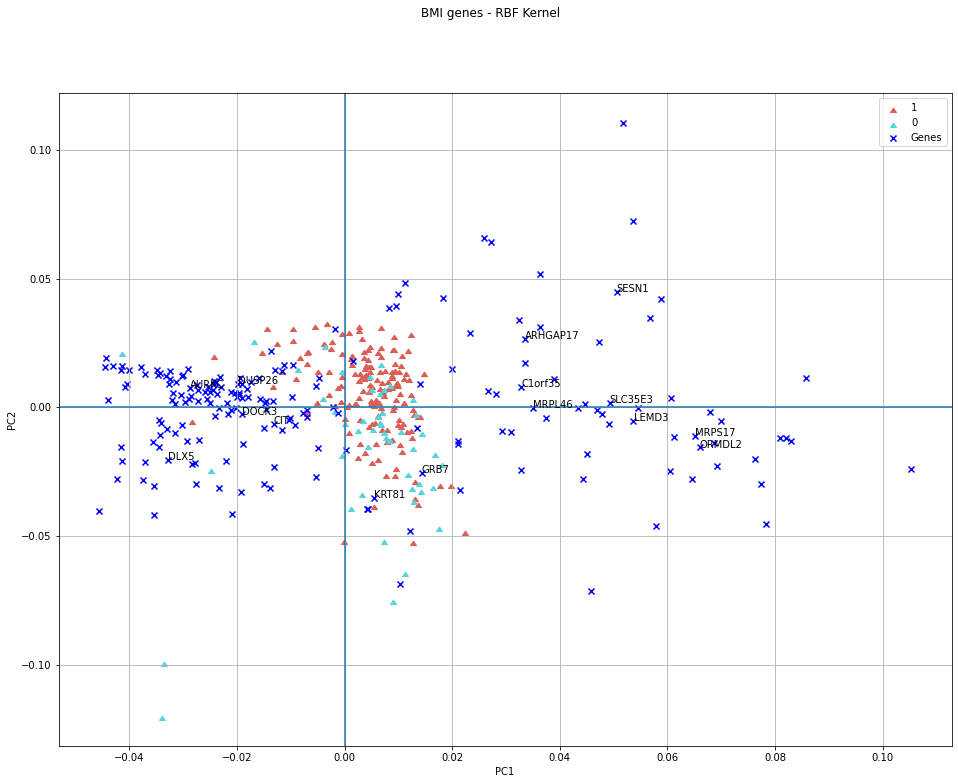

In [389]:
from utils_emb import plot_emb_projection
dist_bmi_df = plot_emb_projection(X_tr_17705[primary_genes], y=y_tr_17705, ker="rbf", params={"gamma": 0.001}, annotate=True, annotate_list=primary_genes[:15] ,return_dist=True, label="Genes", title="BMI genes - RBF Kernel")

n_components=(194, 193)


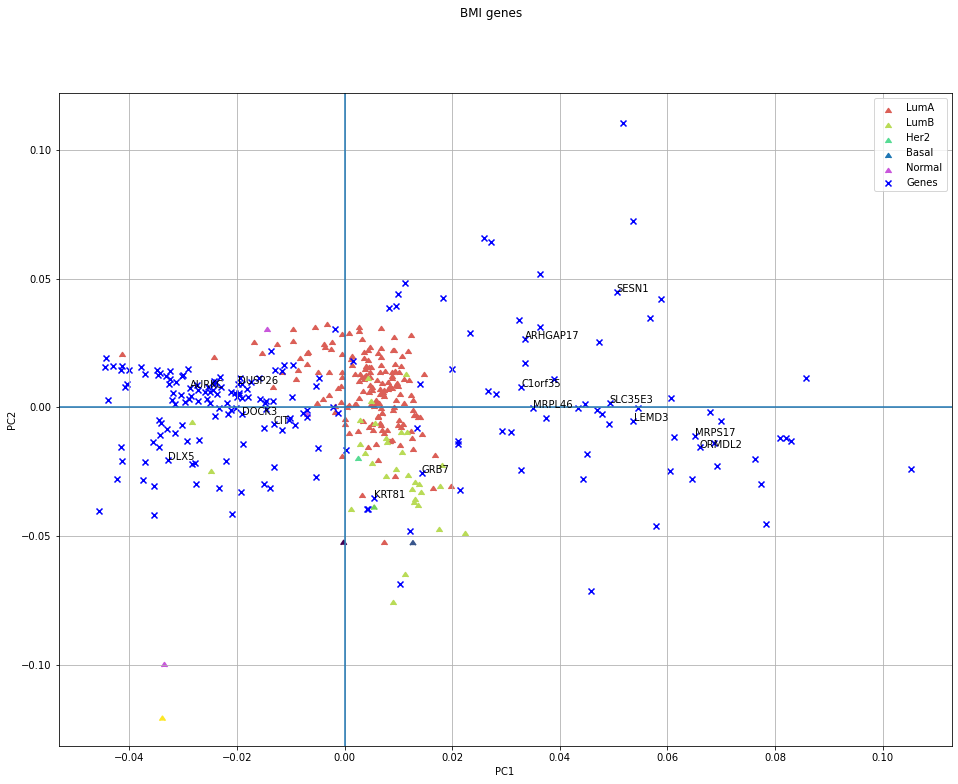

In [348]:
plot_emb_projection(X_tr_17705[primary_genes], y=st_tamx_df["pam_coincide"], target_name="pam_coincide", ker="rbf", params={"gamma": 0.001}, annotate=True, annotate_list=primary_genes[:15] ,return_dist=False, label="Genes", title="BMI genes - RBF Kernel")

In [398]:
dist_bmi_df_out = dist_bmi_df.join(st_tamx_df["posOutcome"])
dist_bmi_df_out_0 = dist_bmi_df_out[dist_bmi_df_out["posOutcome"] == 0]
dist_bmi_df_out.var().sort_values(ascending=False)

posOutcome    0.181558
MYLPF         0.000767
SMPX          0.000754
MYOT          0.000749
GRIK5         0.000735
                ...   
FOXD1         0.000340
DSG3          0.000340
PKP1          0.000317
KRT16         0.000300
NDRG1         0.000295
Length: 195, dtype: float64